# Assignment 2

 Roshifah Dinilqoyyimah A.

 PYTN-KS10-020

Statistics yang akan dibahas pada Assignment 2 ini, antara lain :

- Measure of Central Tendency : Mean

- Measure of Cntral Tendency : Median

- Measure of Central Tendency : Modus

- Measure of Spread : Range

- Measure of Spread : Variance

- Measure of Spread : Standard Deviation

- Probability Distribution

- Convidence Intervals

- Hypothesis Testing

## Import Libraries

In [410]:
import pandas as pd
import numpy as np
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats as scistats
import statsmodels.api as sm
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Prepocessing

In [411]:
# membaca dataset
df_sales = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns',22)

In [412]:
# melihat dataset
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [413]:
# dimensi dataset
df_sales.shape

(84548, 22)

In [414]:
# info dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [415]:
# menghapus kolom yang tidak dibutuhkan
df_sales.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1, inplace=True)
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [416]:
# type SALE PRICE ke numerik, misval akan diset sebagai NaN
df_sales['SALE PRICE'] = pd.to_numeric(df_sales['SALE PRICE'], errors='coerce')

# type LAND SQUARE FEET dan GROSS SQUARE FEET ke numerik
df_sales['LAND SQUARE FEET'] = pd.to_numeric(df_sales['LAND SQUARE FEET'], errors='coerce')
df_sales['GROSS SQUARE FEET'] = pd.to_numeric(df_sales['GROSS SQUARE FEET'], errors='coerce')

# type SALE DATE ke datetime
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'], errors='coerce')

# Kolom di bawah ini harus categorical
categorical = ['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df_sales[col] = df_sales[col].astype('category')

In [417]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [418]:
df_nan = round((df_sales.isnull().sum())/len(df_sales)*100,2)
df_nan = pd.DataFrame(df_nan)
df_nan = df_nan.rename(columns={0:'missing_value_percentage'})
df_nan

,missing_value_percentage
BOROUGH,0.00
NEIGHBORHOOD,0.00
BUILDING CLASS CATEGORY,0.00
TAX CLASS AT PRESENT,0.00
BLOCK,0.00
LOT,0.00
BUILDING CLASS AT PRESENT,0.00
RESIDENTIAL UNITS,0.00
COMMERCIAL UNITS,0.00
TOTAL UNITS,0.00


In [419]:
df_sales = df_sales.dropna()

In [420]:
# Memeriksa kembali apakah masih terdapat missing value atau tidak
df_sales.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [421]:
df_sales

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [422]:
# memeriksa duplicates
df_sales.duplicated().sum()

403

In [423]:
# drop duplicates
df_sales = df_sales.drop_duplicates(df_sales.columns, keep='last')

In [424]:
# memeriksa kembali duplicates
df_sales.duplicated().sum()

0

In [425]:
# mapping kolom BOROUGH
df_sales['BOROUGH'] = df_sales['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [426]:
df_sales.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,47841.000000,47841.000000,47841.00000,47841.000000,47841.000000,4.784100e+04,4.784100e+04,47841.000000,4.784100e+04
mean,4995.682176,234.953074,2.50279,0.237391,2.759161,3.261740e+03,3.500266e+03,1828.399260,1.159345e+06
std,3429.821717,496.153115,16.44339,10.851727,19.825053,3.054095e+04,2.899514e+04,463.183273,1.345030e+07
min,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2224.000000,21.000000,1.00000,0.000000,1.000000,1.405000e+03,8.200000e+02,1920.000000,1.000000e+05
50%,4666.000000,45.000000,1.00000,0.000000,1.000000,2.133000e+03,1.620000e+03,1931.000000,4.850000e+05
75%,7009.000000,94.000000,2.00000,0.000000,2.000000,3.050000e+03,2.508000e+03,1961.000000,8.350000e+05
max,16319.000000,9009.000000,1844.00000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [427]:
df_sales.describe(include='category')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,47841,47841,47841,47841,47841,47841,47841
unique,5,251,47,11,160,4,160
top,Brooklyn,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,A1,1,A1
freq,23805,1427,14334,31024,5225,32265,5220


In [428]:
# outlier kolom sale price
df_sales['SALE PRICE'].describe()

count    4.784100e+04
mean     1.159345e+06
std      1.345030e+07
min      0.000000e+00
25%      1.000000e+05
50%      4.850000e+05
75%      8.350000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

nilai maksimum sale price sekitar 2.000.000.000 USD dan nilai kuartil-3nya sekitar 8.400.000 USD. maka untuk melihat distribusi dari sale price, nilai sale price diatas 5.000.000 USD tidak disertakan dan dari nilai kuartil-1 yang sekitar 100.000 USD sehingga nilai sale price dibawah ini tidak disertakan juga.

Text(0.5, 1.0, 'Distribusi dari SALE PRICE')

<Figure size 720x360 with 0 Axes>

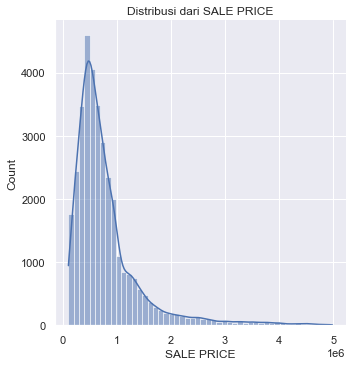

In [429]:
df_sales = df_sales[(df_sales['SALE PRICE']>100000) & (df_sales['SALE PRICE']<5000000)]
plt.figure(figsize=(10,5))
sns.displot(df_sales['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi dari SALE PRICE')

setelah dilakukan analisis, nilai di bawah kuartil 1 dan diatas kuartil 3 dianggap sebagai outlier. sehingga didapatkan nilai minimum sekitar 100.000 USD dan nilai maksimum sekitar 5.000.000 USD.

In [430]:
df_sales['SALE PRICE'].describe()

count    3.469200e+04
mean     7.959725e+05
std      6.532762e+05
min      1.007000e+05
25%      4.160000e+05
50%      6.150000e+05
75%      9.300000e+05
max      4.986410e+06
Name: SALE PRICE, dtype: float64

In [431]:
df_sales = df_sales[df_sales['LAND SQUARE FEET'] != 0]
df_sales = df_sales[df_sales['GROSS SQUARE FEET'] != 0]

In [432]:
# Mengurutkan indeks sesuai dengan nomor baris
df_sales.reset_index(inplace=True)
df_sales.head()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
1,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
2,172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
3,174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03
4,195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28


In [433]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26739 entries, 0 to 26738
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26739 non-null  int64         
 1   BOROUGH                         26739 non-null  category      
 2   NEIGHBORHOOD                    26739 non-null  category      
 3   BUILDING CLASS CATEGORY         26739 non-null  category      
 4   TAX CLASS AT PRESENT            26739 non-null  category      
 5   BLOCK                           26739 non-null  int64         
 6   LOT                             26739 non-null  int64         
 7   BUILDING CLASS AT PRESENT       26739 non-null  category      
 8   RESIDENTIAL UNITS               26739 non-null  int64         
 9   COMMERCIAL UNITS                26739 non-null  int64         
 10  TOTAL UNITS                     26739 non-null  int64         
 11  LA

#### Measure of Central Tedency: Mean

question: berapa rata-rata luas lahan (gross square feet) NYC property sales berdasarkan wilayahnya?

In [434]:
df_mean_luas = df_sales[['BOROUGH', 'GROSS SQUARE FEET']]
df_mean_luas.head()

,BOROUGH,GROSS SQUARE FEET
0,Manhattan,6794.0
1,Manhattan,4226.0
2,Manhattan,3360.0
3,Manhattan,3713.0
4,Manhattan,3586.0


In [435]:
df_mean_luas = df_mean_luas.groupby('BOROUGH').mean().reset_index()
df_mean_luas

,BOROUGH,GROSS SQUARE FEET
0,Manhattan,13096.350649
1,Bronx,3005.335502
2,Brooklyn,2769.818170
3,Queens,2451.542947
4,Staten Island,2198.328781


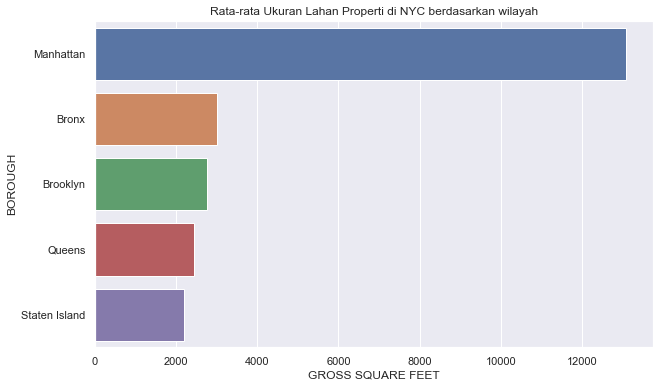

In [436]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'BOROUGH', x = 'GROSS SQUARE FEET', data=df_mean_luas)
plt.title("Rata-rata Ukuran Lahan Properti di NYC berdasarkan wilayah")
plt.show()

In [437]:
# dengan numpy
mean_ = np.mean(df_mean_luas)
mean_

GROSS SQUARE FEET    4704.27521
dtype: float64

In [438]:
# dengan pandas
mean_ = df_mean_luas.mean()
mean_

GROSS SQUARE FEET    4704.27521
dtype: float64

-> Kesimpulan

Berdasarkan hasil plot, diketahui bahwa rata-rata luas lahan keseluruhan properti tertinggi adalah di wilayah Manhattan dibandingkan dengan wilayah lain, dan wilayah Staten Island memiliki rata-rata luas lahan keseluruhan properti terendah.

untuk hasil rata-rata dari data gross square feet nilai rata-ratanya adalah 4704.27521.

#### Measure of Central Tedency: Median

question: berapa nilai median dari RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS?

In [460]:
df_unit = df_sales[['RESIDENTIAL UNITS', 'TOTAL UNITS']]
df_unit

,RESIDENTIAL UNITS,TOTAL UNITS
0,10,10
1,8,8
2,3,4
3,5,6
4,0,1
...,...,...
26734,2,2
26735,2,2
26736,2,2
26737,2,2


In [440]:
print("MEDIAN RESIDENTIAL UNITS = ", df_sales['RESIDENTIAL UNITS'].median())

MEDIAN RESIDENTIAL UNITS =  2.0


In [442]:
print("MEDIAN TOTAL UNIT = ", df_sales['TOTAL UNITS'].median())

MEDIAN TOTAL UNIT =  2.0


-> Kesimpulan

Didapatkan nilai median dari residential units pada dataset NYC Property Sales adalah 2.0 begitu juga dengan nilai median dari total units didapatkan nilai mediannya sebesar 2.0

#### Measure of Central Tedency: Modus

question: carilah nilai modus year built bedasarkan neighborhood woodrow

In [443]:
neigh_woodrow = df_sales[df_sales['NEIGHBORHOOD'] == 'WOODROW']
neigh_woodrow

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
26650,84417,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6912,115,A1,1,0,1,6400.0,2536.0,1980,1,A1,640000.0,2016-09-21
26651,84418,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6914,69,A1,1,0,1,4000.0,2024.0,1974,1,A1,664000.0,2016-11-22
26652,84422,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6925,42,A5,1,0,1,2000.0,1496.0,1984,1,A5,470000.0,2016-12-08
26653,84423,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6926,38,A5,1,0,1,1900.0,1496.0,1985,1,A5,470000.0,2016-12-08
26654,84424,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6926,41,A5,1,0,1,1900.0,1496.0,1985,1,A5,465000.0,2016-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26734,84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31
26735,84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07
26736,84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
26737,84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21


In [444]:
# menghapus beberapa column karena hanya membutuhkan kolom YEAR BUILT
df_mode_nw = neigh_woodrow.drop(['NEIGHBORHOOD','BOROUGH','BLOCK','LOT',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET',
                            'SALE PRICE','TOTAL UNITS','BUILDING CLASS CATEGORY',
                            'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'index'],
                           axis=1, inplace = False)
df_mode_nw

,YEAR BUILT
26650,1980
26651,1974
26652,1984
26653,1985
26654,1985
...,...
26734,1995
26735,1994
26736,1998
26737,1998


In [445]:
# Menghitung modus/mode dengan scipy
mode_ = scistats.mode(df_mode_nw)
mode_

ModeResult(mode=array([[1998]], dtype=int64), count=array([[10]]))

In [446]:
print(mode_.mode)
print(mode_.count)

[[1998]]
[[10]]


-> Kesimpulan

nilai modus dari data year built berdasarkan neighborhood Woodrow adalah 1998 yang muncul sebanyak 10 kali. yang berarti pada tahun 1998 neighborhood Woodrow paling banyak melakukan penjualan atau transaksi yang berjumlah 10 kali. 

#### Measured of Spread: Range

question: berapakah rentang data/range sale price dari wilayah brooklyn?

In [447]:
wilayah_Bn = df_sales[df_sales['BOROUGH'] == 'Brooklyn']
wilayah_Bn

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3536,25355,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,A5,1,0,1,1547.0,1428.0,1930,1,A5,800000.0,2017-02-27
3537,25358,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,S1,1,1,2,1342.0,1920.0,1926,1,S1,1200000.0,2017-03-31
3538,25359,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,S1,1,1,2,1740.0,3240.0,1925,1,S1,1090000.0,2016-10-24
3539,25361,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,S1,1,1,2,1172.0,1800.0,1920,1,S1,1060000.0,2017-04-21
3540,25362,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,A1,1,0,1,5750.0,2386.0,1901,1,A1,2050000.0,2017-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,49381,Brooklyn,WYCKOFF HEIGHTS,14 RENTALS - 4-10 UNIT,2A,3200,33,S5,5,1,6,1800.0,4860.0,1931,2,S5,2200000.0,2017-08-02
11424,49386,Brooklyn,WYCKOFF HEIGHTS,14 RENTALS - 4-10 UNIT,2A,3291,6,S5,5,1,6,2113.0,4500.0,1931,2,S5,2225000.0,2017-03-10
11425,49392,Brooklyn,WYCKOFF HEIGHTS,27 FACTORIES,4,3280,52,F5,0,1,1,4760.0,9000.0,1931,4,F5,300000.0,2017-03-28
11426,49393,Brooklyn,WYCKOFF HEIGHTS,27 FACTORIES,4,3319,27,F4,0,1,1,3975.0,4500.0,1931,4,F4,3425000.0,2017-01-12


In [448]:
# menghapus beberapa kolom karena hanya membutuhkan kolom SALE PRICE
df_range = wilayah_Bn.drop(['NEIGHBORHOOD','BLOCK','LOT',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET',
                            'YEAR BUILT','TOTAL UNITS','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE', 'index', 'SALE DATE'],
                           axis=1, inplace = False)
df_range

,BOROUGH,SALE PRICE
3536,Brooklyn,800000.0
3537,Brooklyn,1200000.0
3538,Brooklyn,1090000.0
3539,Brooklyn,1060000.0
3540,Brooklyn,2050000.0
...,...,...
11423,Brooklyn,2200000.0
11424,Brooklyn,2225000.0
11425,Brooklyn,300000.0
11426,Brooklyn,3425000.0


In [449]:
# mengubah BOROUGH menjadi index
range_ = df_range.set_index(['BOROUGH'])
range_

,SALE PRICE
BOROUGH,
Brooklyn,800000.0
Brooklyn,1200000.0
Brooklyn,1090000.0
Brooklyn,1060000.0
Brooklyn,2050000.0
...,...
Brooklyn,2200000.0
Brooklyn,2225000.0
Brooklyn,300000.0


In [450]:
# Menghitung range menggunakan NumPy
np.ptp(range_)

SALE PRICE    4874000.0
dtype: float64

In [451]:
# Menghitung range menggunakan pandas
print('max sale price:', range_.max())
print('min sale price:', range_.min())

max sale price: SALE PRICE    4975000.0
dtype: float64
min sale price: SALE PRICE    101000.0
dtype: float64


-> Kesimpulan

dari perhitungan didapatkan range atau rentang dari data sale price untuk wilayah brooklyn adalah 4874000.0. dimana nilai maksimumnya adalah 4975000.0 dan nilai minimumnya adalah 101000.0

#### Measured of Spread: Variance

question: berapa nilai variance dari sale price dan total units?

In [452]:
print('Sampel Variance dari SALE PRICE = ', df_sales['SALE PRICE'].var())
print('Sampel Variance dari TOTAL UNITS = ', df_sales['TOTAL UNITS'].var())

Sampel Variance dari SALE PRICE =  416916233943.9639
Sampel Variance dari TOTAL UNITS =  362.419763928769


-> Kesimpulan

didapatkan untuk sampel variance dari sale price dan total units secara berturut-turut adalah 416916233943.9639 dan 362.419763928769

#### Measured of Spread: Standard Deviation

question: berapa nilai standard deviation dari sale price dan total units?

In [453]:
print('Sampel Standard Deviation dari SALE PRICE = ', df_sales['SALE PRICE'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari TOTAL UNITS = ', df_sales['TOTAL UNITS'].var(ddof=1)**0.5)

Sampel Standard Deviation dari SALE PRICE =  645690.5094114083
Sampel Standard Deviation dari TOTAL UNITS =  19.03732554558988


-> Kesimpulan

didapatkan untuk sampel standard deviation dari sale price dan total units secara berturut-turut adalah 645690.5094114083 dan 19.03732554558988

#### Probability Distribution

question: bagaimana probability distribution sale price dari daerah sekitar woodrow

In [454]:
woodrow_sale = df_sales[df_sales['NEIGHBORHOOD'] == 'WOODROW']
woodrow_sale

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
26650,84417,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6912,115,A1,1,0,1,6400.0,2536.0,1980,1,A1,640000.0,2016-09-21
26651,84418,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6914,69,A1,1,0,1,4000.0,2024.0,1974,1,A1,664000.0,2016-11-22
26652,84422,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6925,42,A5,1,0,1,2000.0,1496.0,1984,1,A5,470000.0,2016-12-08
26653,84423,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6926,38,A5,1,0,1,1900.0,1496.0,1985,1,A5,470000.0,2016-12-08
26654,84424,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,6926,41,A5,1,0,1,1900.0,1496.0,1985,1,A5,465000.0,2016-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26734,84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31
26735,84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07
26736,84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
26737,84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21


In [455]:
# menghapus beberapa kolom karena hanya membutuhkan kolom LOT
df_stdv = woodrow_sale.drop(['YEAR BUILT', 'TOTAL UNITS', 'BOROUGH', 'LOT', 'BLOCK',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'index'],
                           axis=1, inplace = False)
df_stdv.head()

,NEIGHBORHOOD,SALE PRICE
26650,WOODROW,640000.0
26651,WOODROW,664000.0
26652,WOODROW,470000.0
26653,WOODROW,470000.0
26654,WOODROW,465000.0


In [456]:
df_stdv = df_stdv.set_index(['NEIGHBORHOOD'])
df_stdv.tail()

,SALE PRICE
NEIGHBORHOOD,
WOODROW,509000.0
WOODROW,648000.0
WOODROW,450000.0
WOODROW,550000.0
WOODROW,460000.0


Text(0.5, 1, 'Probability Distribution SALE PRICE di daerah WOODROW')

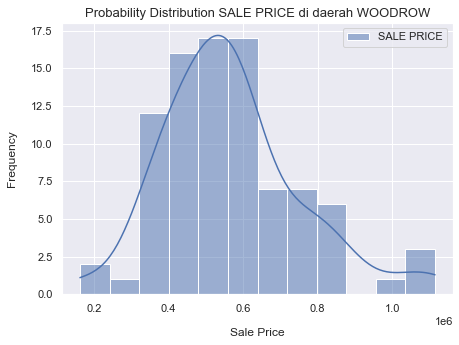

In [457]:
# view distribution
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(df_stdv, color='blue', kde=True)
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Frequency', labelpad=14)
plt.title('Probability Distribution SALE PRICE di daerah WOODROW', y=1, fontsize=13)

-> Kesimpulan

untuk probability distribution sale price dari daerah sekitar woodrow berdasrkan grafik yang ditampilkan, maka probability distributionnya cukup berdistribusi normal.

#### Confidence Intervals

question: confidence interval untuk rata-rata harga penjualan di NYC dan confidence interval untuk luas lahan properti seluruhnya di NYC

In [461]:
# untuk rata-rata harga penjualan
x = df_sales['SALE PRICE']

m = x.mean()
s = x.std()
dof = len(x)-1 #untuk memnentukan nilai statistik uji (degree of freedom)

confidance = 0.95 #Peluang
t_crit = np.abs(t.ppf((1-confidance)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))),2)

print(values)

[798757.31 814236.55]


In [459]:
# untuk luas lahan
x = df_sales['GROSS SQUARE FEET']

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom untuk memnentukan nilai statistik uji

confidance = 0.95 #Peluang
t_crit = np.abs(t.ppf((1-confidance)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))),2)

print(values)

[2387.5  2990.87]


-> Kesimpulan

Berdasarkan output di atas, diketahui bahwa rata-rata harga penjualan properti di NYC berada di antara 798757.31 USD sampai 814236.55 USD dengan peluang atau selang kepercayaan 0.95 atau 95%.

Berdasarkan output di atas, diketahui bahwa luas lahan properti di NYC memiliki rata-rata sebesar 2387.5 square feet sampai degan 2990.87 square feet dengan rata-rata harga sekitar 800.000 USD.

#### Hypothesis testing

question: Apakah wilayah brooklyn memiliki rata-rata sale price yang lebih  tinggi secara signifikan daripada wilayah staten island?

- H0: tidak ada perbedaan secara signifikan dari rata-rata sale price antara brooklyn dan staten island

- H1: terdapat perbedaan secara signifikan pada rata-rata sale price antara brooklyn dan staten island

In [467]:
df_wilayah = df_sales[['BOROUGH', 'SALE PRICE']]
df_brooklyn = df_wilayah[df_wilayah['BOROUGH'] == 'Brooklyn']
df_brooklyn.head()

,BOROUGH,SALE PRICE
3536,Brooklyn,800000.0
3537,Brooklyn,1200000.0
3538,Brooklyn,1090000.0
3539,Brooklyn,1060000.0
3540,Brooklyn,2050000.0


In [469]:
df_wilayah = df_sales[['BOROUGH', 'SALE PRICE']]
df_SI = df_wilayah[df_wilayah['BOROUGH'] == 'Staten Island']
df_SI.head()

,BOROUGH,SALE PRICE
21906,Staten Island,437500.0
21907,Staten Island,579000.0
21908,Staten Island,370000.0
21909,Staten Island,439000.0
21910,Staten Island,300000.0


In [470]:
n1 = len(df_brooklyn)
me1 = df_brooklyn['SALE PRICE'].mean()
sd1 = df_brooklyn['SALE PRICE'].std()

(n1, me1, sd1)

(7892, 1101228.3158895085, 802784.3222131723)

In [471]:
n2 = len(df_SI)
me2 = df_SI['SALE PRICE'].mean()
sd2 = df_SI['SALE PRICE'].std()

(n1, me2, sd2)

(7892, 533080.4247879164, 274165.1569911798)

In [476]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(df_brooklyn['SALE PRICE'],df_SI['SALE PRICE'])
print("pval: ",float(pval))
if pval>0.05:
    print("H0 diterima")
else:
    print("H1 diterima")

pval:  0.0
H1 diterima


Text(0, 0.5, 'FREQUENCY')

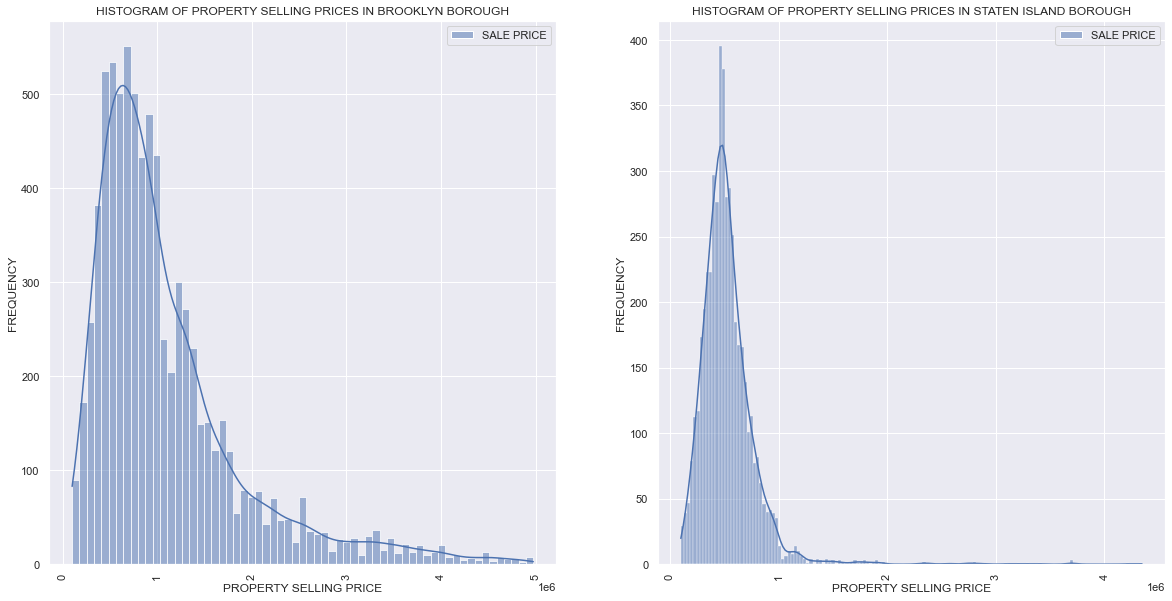

In [481]:
# menampilkan distribusi dari data penjualan wilayah brooklyn dan staten island
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for brooklyn
sns.histplot(df_brooklyn, kde=True, ax=ax)
ax.set_title('HISTOGRAM OF PROPERTY SELLING PRICES IN BROOKLYN BOROUGH')
ax.set_xlabel('PROPERTY SELLING PRICE')
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('FREQUENCY')

# Plotting for Staten Island
sns.histplot(df_SI, kde=True, ax=ax0)
ax0.set_title('HISTOGRAM OF PROPERTY SELLING PRICES IN STATEN ISLAND BOROUGH')
ax0.set_xlabel('PROPERTY SELLING PRICE')
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('FREQUENCY')

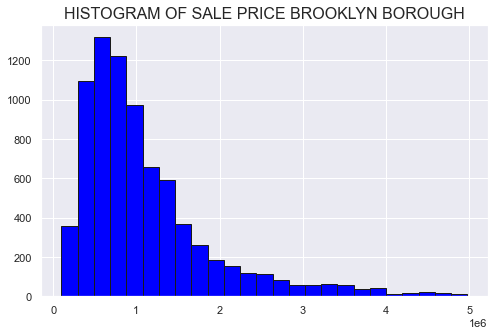

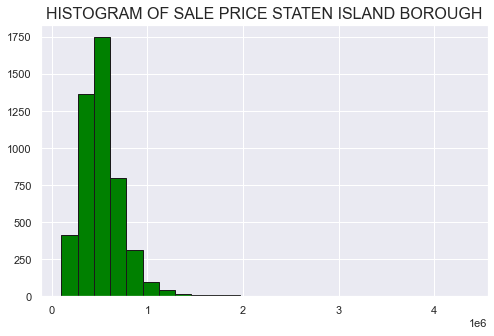

In [483]:
# Plotting wilayah brooklyn
plt.figure(figsize=(8,5))
plt.title('HISTOGRAM OF SALE PRICE BROOKLYN BOROUGH', fontsize=16)
plt.hist(df_brooklyn["SALE PRICE"].dropna(),edgecolor='k', color='blue',bins=25)
plt.show()

# Plotting wilayah staten isalnd
plt.figure(figsize=(8,5))
plt.title('HISTOGRAM OF SALE PRICE STATEN ISLAND BOROUGH', fontsize=16)
plt.hist(df_SI["SALE PRICE"].dropna(),edgecolor='k', color='green',bins=25)
plt.show()

-> Kesimpulan

karena nilai p-value kurang dari 0.05 (sangat kecil), sehingga hipotesis H1 diterima bahwa rata-rata sale price wilayah brooklyn lebih besar secara signifikan daripada sale price wilayah staten island. menggunakan z-test karena untuk memeriksa ketidaksamaan.

### Overall Analysis

Analisis secara keseluruhan yang diperoleh, sebagai berikut:

1. bahwa wilayah Manhattan memiliki rata-rata luas lahan properti tertinggi daripada wilayah Bronx, Brooklyn, Queens, Staten Island. dan wilayah Staten Island rata-rata luas lahannya terendah.

2. pada tahun 1998 daerah Woodrow paling sering terjadi transaksi atau penjualan yang dilakukan sebanyak 10 kali pada tahun yang sama. dan probabilitas distribusi daerah Woodrow berdistribusi normal.

3. didapatkan bahwa rentang harga jual properties di wilayah brooklyn adalah 4874000.0 USD. dan rata-rata sale price brooklyn lebih besar secara signifikan daripada sale price staten island.

4. secara keseluruhan rata-rata harga penjualan properti di NYC berada di antara 798757.31 USD sampai 814236.55 USD.

5. secara kesuluruhan rata-rata luas lahan properti di NYC sekitar 2387.5 square feet sampai degan 2990.87 square feet.

